
<h1><center> <font color='black'>  Network Science (LTAT.02.011) - Project 

<h2><center> <font color='black'> University of Tartu</font></center></h3>


## SVM


In [ ]:
# Importing required libraries (install other libraries if needed)
!pip install node2vec
import pandas as pd
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
from node2vec import Node2Vec
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import os
from scipy import sparse
from sklearn.metrics import f1_score
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, ElasticNet

In [ ]:
# load nodes details
edges = pd.read_csv('musae_facebook_edges.csv')

# load edges (or links)
nodes = pd.read_csv('musae_facebook_target.csv')



In [ ]:
edges=edges.rename(columns={'id_1': 'id'})

In [ ]:
left_merged = pd.merge(edges, nodes, on="id")
left_merged.head()

,id,id_2,facebook_id,page_name,page_type
0,0,18427,145647315578475,The Voice of China 中国好声音,tvshow
1,1,21708,191483281412,U.S. Consulate General Mumbai,government
2,1,22208,191483281412,U.S. Consulate General Mumbai,government
3,1,22171,191483281412,U.S. Consulate General Mumbai,government
4,1,6829,191483281412,U.S. Consulate General Mumbai,government


In [ ]:
X = left_merged[["id", "id_2"]]
y = left_merged["page_type"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size = 0.2, 
                                                random_state = 35)
print("X_train shape: " + str(X_train.shape))
print("X_test shape: " + str(X_test.shape))
print("y_train shape: " + str(y_train.shape))
print("y_test shape: " + str(y_test.shape))

X_train shape: (136801, 2)
X_test shape: (34201, 2)
y_train shape: (136801,)
y_test shape: (34201,)


In [ ]:
feature_scaler = StandardScaler()
feature_scaler.fit_transform(X_train)
X_train = feature_scaler.transform(X_train)
X_test = feature_scaler.transform(X_test)

In [ ]:
classifier = SVC(kernel = 'linear', random_state = 35)
classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=35)

In [ ]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     company       0.00      0.00      0.00      4846
  government       0.52      1.00      0.68     17761
  politician       0.00      0.00      0.00      8623
      tvshow       0.00      0.00      0.00      2971

    accuracy                           0.52     34201
   macro avg       0.13      0.25      0.17     34201
weighted avg       0.27      0.52      0.36     34201




# SVM with Node2Vec


In [ ]:
# Importing required libraries (install other libraries if needed)
!pip install node2vec
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from node2vec import Node2Vec
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
G = nx.from_pandas_edgelist(edges, "id", "id_2", create_using=nx.Graph())


In [ ]:
# Precompute probabilities and generate walks**
node2vec = Node2Vec(G, dimensions=32, walk_length=10, num_walks=1, workers=1)

Computing transition probabilities:   0%|          | 0/22470 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 1/1 [00:10<00:00, 10.25s/it]


In [ ]:
# Embed nodes
model = node2vec.fit(window = 10, min_count=1)

In [ ]:
# save the node embeddings
model.wv.save_word2vec_format('embedding.csv')

In [ ]:
# Retrieve node embeddings
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors

In [ ]:
d = {'Nodes': "", 'Labels': ""}
df = pd.DataFrame(data=d, index = range(0,len(node_ids)))
df.shape

(22470, 2)

In [ ]:

nodes["id"] = nodes['id'].astype('str')

nodes.dtypes

id             object
facebook_id     int64
page_name      object
page_type      object
dtype: object

In [ ]:
for i in range(0, len(node_ids)):
    indices = nodes.index[nodes['id'] == node_ids[i]].tolist()
    if indices == []:
      df.loc[i]['Nodes'] = 0
      df.loc[i]['Labels'] = 0
    else:
      index = indices[0]
      df.loc[i]['Nodes'] = node_ids[i]
      df.loc[i]['Labels'] = nodes.iat[index,3]

In [ ]:
X = node_embeddings
y = df.Labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size = 0.2, 
                                                random_state = 35)
print("X_train shape: " + str(X_train.shape))
print("X_test shape: " + str(X_test.shape))
print("y_train shape: " + str(y_train.shape))
print("y_test shape: " + str(y_test.shape))

X_train shape: (17976, 32)
X_test shape: (4494, 32)
y_train shape: (17976,)
y_test shape: (4494,)


In [ ]:
feature_scaler = StandardScaler()
feature_scaler.fit_transform(X_train)
X_train = feature_scaler.transform(X_train)
X_test = feature_scaler.transform(X_test)

In [ ]:
classifier = SVC(kernel = 'linear', random_state = 35)
classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=35)

In [ ]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     company       0.50      0.78      0.61      1255
  government       0.71      0.64      0.67      1403
  politician       0.62      0.60      0.61      1186
      tvshow       0.74      0.16      0.27       650

    accuracy                           0.60      4494
   macro avg       0.64      0.54      0.54      4494
weighted avg       0.63      0.60      0.58      4494



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=['company' 'government' 'politician' 'tvshow'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


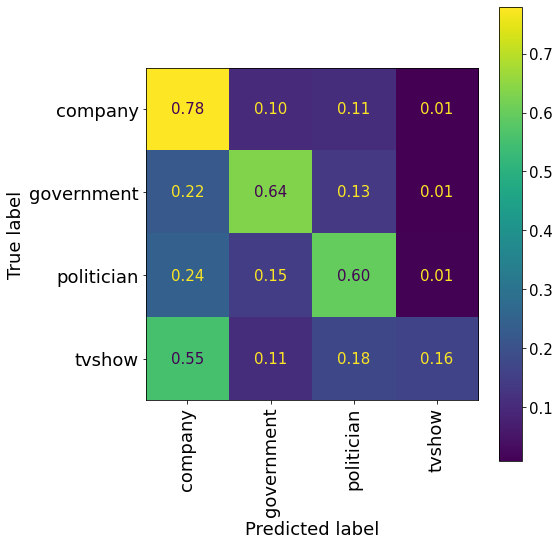

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
labels = pd.unique(y)


conf_mat = confusion_matrix(y_test, y_pred, labels, normalize = "true")
cmd = ConfusionMatrixDisplay(conf_mat, display_labels=labels)
fig, ax = plt.subplots(figsize=(8,8))
cmd.plot(ax=ax,values_format = '.2f')
ax.tick_params(axis='x', rotation=90)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
plt.rcParams.update({'font.size': 10})
fig.tight_layout()
fig.savefig('LRconf_mat.png')